In [70]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [71]:
from scipy.stats import nakagami

In [72]:
loc = 1
scale = 3

In [73]:
c = 5
nakagami_sts = nakagami.rvs(c, loc=loc, scale=scale, size = 1000)
nakagami_sts.sort()

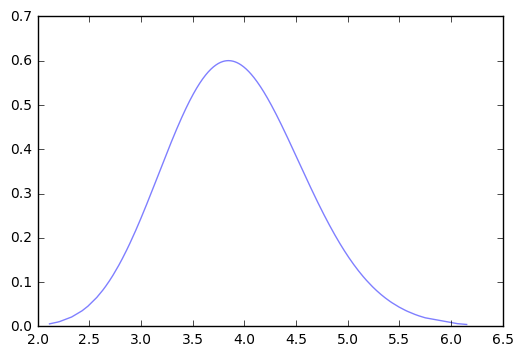

In [74]:
pdf  = nakagami.pdf(nakagami_sts, 5, loc=loc, scale=scale)
plt.plot(nakagami_sts, pdf, alpha = 0.5);

С помощью графика плотности оценили значение параметров μ и ω

In [75]:
mu = 5
w = 1

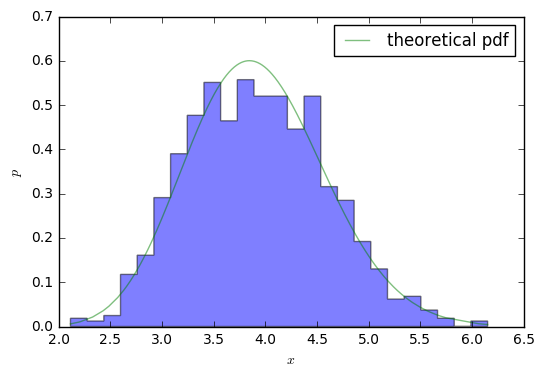

In [76]:
plt.hist(nakagami_sts, normed = True, histtype = 'stepfilled', alpha = 0.5, bins = 25)
plt.plot(nakagami_sts, pdf, label = 'theoretical pdf', alpha = 0.5)
plt.legend()
plt.ylabel('$p$')
plt.xlabel('$x$');

In [77]:
def sapmle_medium(volume):
    list_samples = list()
    list_means = list()
    for i in range(0, 1000):
        sample = nakagami.rvs(c, loc=loc, scale=scale, size = volume)
        list_samples.append(sample)
        list_means.append(np.sum((sample) / volume)) 
    return list_samples, list_means

In [78]:
n_five_sample, n_five_means = sapmle_medium(5) #n_five_sample - 1000 выборок заданного размера, 
                                                #n_five_means - соответсвиующие выборочные средние

In [79]:
n_ten_sample, n_ten_means = sapmle_medium(10)

In [80]:
n_fifty_sample, n_fifty_means = sapmle_medium(50)

## Выборка объема 5

C:\Users\Павел\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


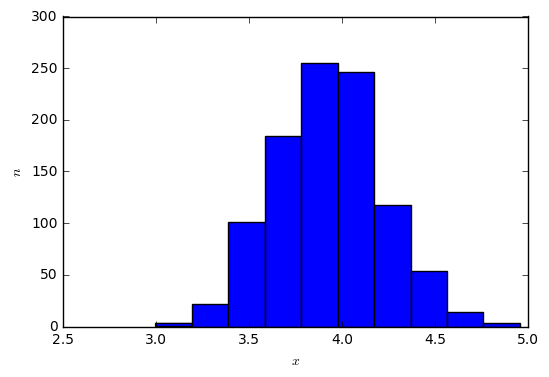

In [81]:
plt.hist(n_five_means)
plt.legend(loc = 'best', frameon = False)
plt.ylabel('$n$')
plt.xlabel('$x$');

## Выборка объема 10

C:\Users\Павел\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


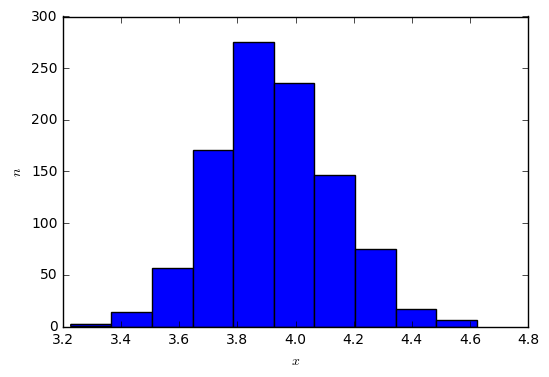

In [82]:
plt.hist(n_ten_means)
plt.legend(loc = 'best', frameon = False)
plt.ylabel('$n$')
plt.xlabel('$x$');

## Выборка объема 50

C:\Users\Павел\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


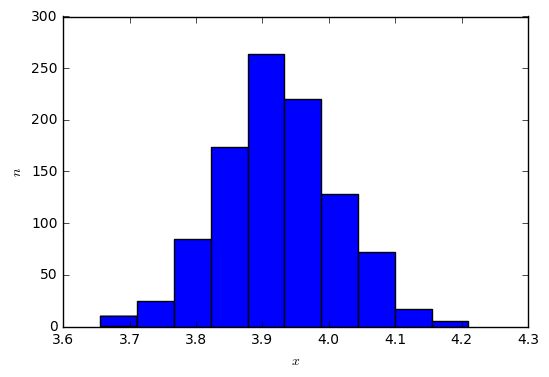

In [83]:
plt.hist(n_fifty_means)
plt.legend(loc = 'best', frameon = False)
plt.ylabel('$n$')
plt.xlabel('$x$');

Вычислим значения _mean_ и _std_

In [84]:
mean = nakagami.mean(5, loc = loc, scale = scale)
mean

3.9260502314356875

In [85]:
std = nakagami.std(5, loc = loc, scale = scale)
std

0.66198945846226109

Функция, считающая цпт

In [86]:
def cpt(volume, list_means_new):
    list_end = list()
    for i in range(0, 1000):
        test = (((list_means_new[i] - mean) / std ) * math.sqrt(volume))
        list_end.append(test)
    return list_end

In [87]:
list_means_cpt_5 = cpt(5, n_five_means)

In [88]:
len(list_means_cpt_5)

1000

In [89]:
list_means_cpt_10 = cpt(10, n_ten_means)

In [90]:
list_means_cpt_50 = cpt(50, n_fifty_means)

In [91]:
def cpt_draw(array_means):
    plt.hist(array_means, normed = True, bins = 25)
    pdf = sts.norm.pdf(array_means)
    plt.plot(array_means, pdf, alpha = 0.5)
    plt.ylabel('$p$')
    plt.xlabel('$x$');

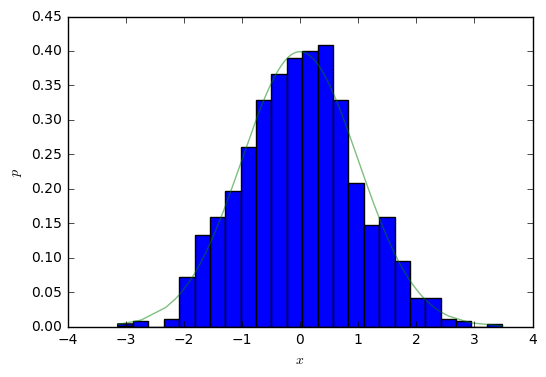

In [92]:
list_means_cpt_5.sort()
cpt_draw(list_means_cpt_5)

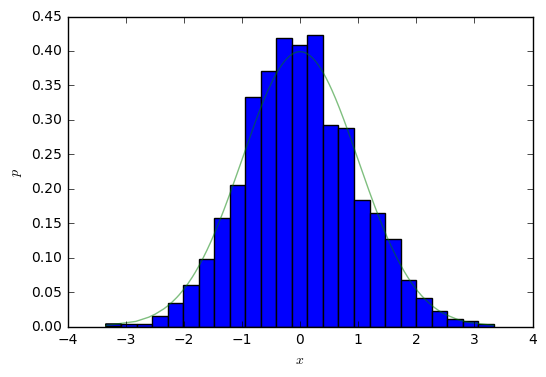

In [93]:
list_means_cpt_10.sort()
cpt_draw(list_means_cpt_10)

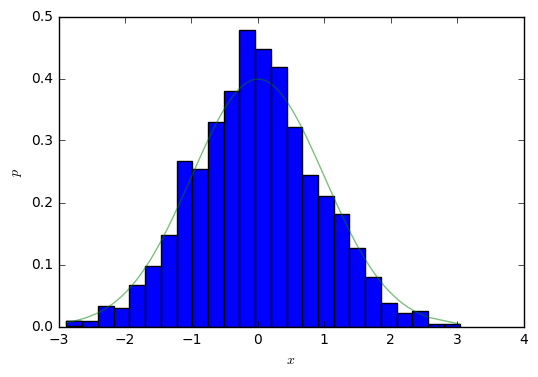

In [94]:
list_means_cpt_50.sort()
cpt_draw(list_means_cpt_50)

Вывод: чем больше объем выборки, тем выше должна быть точность аппроксимации. 